# Home Credit Scorecard Model
by: Ahmad Sabil Deva Pratama

## About Company:
PT Home Credit Indonesia or better known as Home Credit is a multinational multi-purpose finance company. The company builds in-store financing services (on-the-spot cashless financing) for consumers who want to purchase products such as household appliances, electronic devices, mobile phones, and furniture. It also builds technology-based financing services. Founded in 2013 in Jakarta, Home Credit currently has more than 19,000 distribution points across 144 cities in Indonesia. As of March 2019, the company has served 3.4 million customers online and offline.

## Problem:
To enhance its credit scoring predictions, Home Credit employs various statistical and machine learning methods. The current challenge is to optimize the use of available data, ensuring that creditworthy customers are not unfairly denied loans, and that loan terms, including principal, maturity, and repayment schedules, are tailored to motivate customers to successfully meet their repayment obligations.

## Goal:
To enhance the financial inclusion of creditworthy clients by accurately identifying and providing them with appropriate credit facilities.

## Objective:
To refine the credit evaluation process to:

- Increase the number of loan approvals for clients who will successfully repay.
- Decrease the number of defaults by accurately predicting repayment difficulties.
- Balance the portfolio to maintain a healthy ratio of high-risk to low-risk loans.
- Retain customer trust and satisfaction by reducing wrongful loan rejections.

## Business Metric:
Loan Approval Success Rate (LASR): This metric represents the proportion of approved loans that result in successful repayment without significant delinquencies. It is a direct reflection of the efficacy of the credit scoring model in real-world scenarios.

The LASR can be calculated using the formula:
LASR = Number of loans repaid on time / Total number of loans approved

The LASR serves several purposes:

- It aligns with the goal of increasing financial inclusion by measuring the success rate of approved loans.
- It helps monitor the risk by reflecting the proportion of loans that do not go into default.
- It supports customer satisfaction metrics, as a high LASR suggests that loans are being approved for clients who are indeed capable of repayment.

# About Dataset

The data is provided by Home Credit. There are 8 dataset:

1. application_{train|test}.csv
    - This is the main table, broken into two files for Train (with TARGET) and Test (without TARGET).
    - Static data for all applications. One row represents one loan in our data sample.


2. bureau.csv
    - All client's previous credits provided by other financial institutions that were    reported to Credit Bureau (for clients who have a loan in our sample).
    - For every loan in our sample, there are as many rows as number of credits the    client had in Credit Bureau before the application date.

3. bureau_balance.csv
    - Monthly balances of previous credits in Credit Bureau.
    - This table has one row for each month of history of every previous credit reported to Credit Bureau – i.e the table has (#loans in sample * # of relative previous credits * # of months where we have some history observable for the previous credits) rows.

4. POS_CASH_balance.csv
    - Monthly balance snapshots of previous POS (point of sales) and cash loans that the applicant had with Home Credit.
    - This table has one row for each month of history of every previous credit in Home Credit (consumer credit and cash loans) related to loans in our sample – i.e. the table has (#loans in sample * # of relative previous credits * # of months in which we have some history observable for the previous credits) rows.

5. credit_card_balance.csv
    - Monthly balance snapshots of previous credit cards that the applicant has with Home Credit.
    - This table has one row for each month of history of every previous credit in Home Credit (consumer credit and cash loans) related to loans in our sample – i.e. the table has (#loans in sample * # of relative previous credit cards * # of months where we have some history observable for the previous credit card) rows.

6. previous_application.csv
    - All previous applications for Home Credit loans of clients who have loans in our sample.
    - There is one row for each previous application related to loans in our data sample.

7. installments_payments.csv
    - Repayment history for the previously disbursed credits in Home Credit related to the loans in our sample.
    - There is a) one row for every payment that was made plus b) one row each for missed payment.
    - One row is equivalent to one payment of one installment OR one installment corresponding to one payment of one previous Home Credit credit related to loans in our sample.

8. HomeCredit_columns_description.csv
    - This file contains descriptions for the columns in the various data files

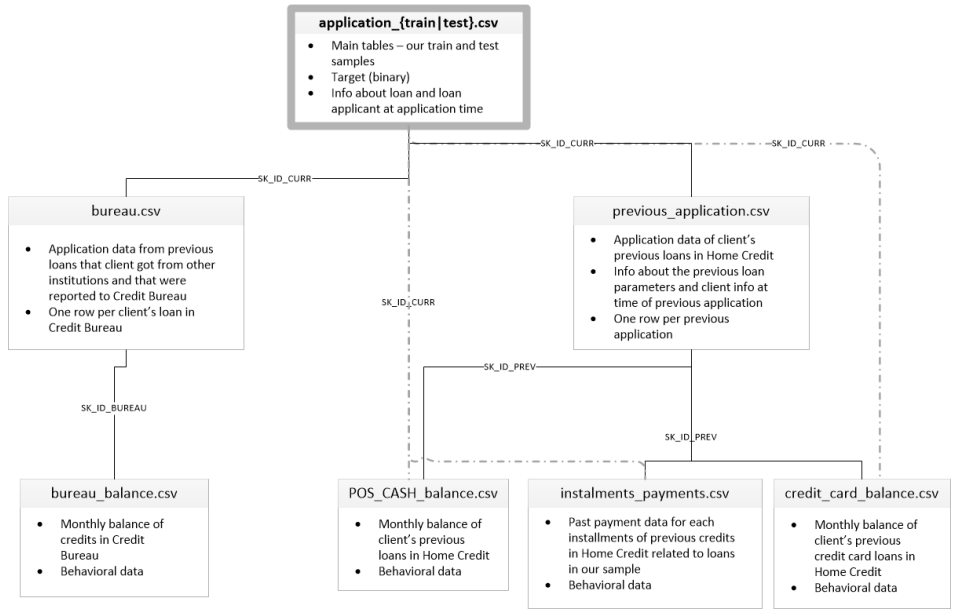

# Download Dataset

In [1]:
import requests
from io import BytesIO
from zipfile import ZipFile

dataset_url = "https://rakamin-lms.s3.ap-southeast-1.amazonaws.com/vix-assets/home-credit-indonesia/home-credit-default-risk.zip"
response = requests.get(dataset_url)
zip_file = ZipFile(BytesIO(response.content))
zip_file.extractall('/content')
zip_file.printdir()
zip_file.close()

File Name                                             Modified             Size
HomeCredit_columns_description.csv             2019-12-11 02:58:06        37383
POS_CASH_balance.csv                           2019-12-11 02:58:12    392703158
application_test.csv                           2019-12-11 02:58:58     26567651
application_train.csv                          2019-12-11 02:59:00    166133370
bureau.csv                                     2019-12-11 02:59:14    170016717
bureau_balance.csv                             2019-12-11 02:59:28    375592889
credit_card_balance.csv                        2019-12-11 03:00:00    424582605
installments_payments.csv                      2019-12-11 03:00:38    723118349
previous_application.csv                       2019-12-11 03:02:12    404973293
sample_submission.csv                          2019-12-11 03:02:44       536202


# Stage 1: Data Exploration and Preprocessing

## 1. EDA

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Load the dataset
application_train = pd.read_csv('application_train.csv')
application_test = pd.read_csv('application_test.csv')
bureau = pd.read_csv('bureau.csv')
bureau_balance = pd.read_csv('bureau_balance.csv')
credit_card_balance = pd.read_csv('credit_card_balance.csv')
installments_payments = pd.read_csv('installments_payments.csv')
POS_CASH_balance = pd.read_csv('POS_CASH_balance.csv')
previous_application = pd.read_csv('previous_application.csv')

In [3]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
# pd.reset_option('display.max_rows')
# pd.reset_option('display.max_columns')

# Basic information
print("Basic Information:")
application_train.info()

Basic Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


- The `application_train.csv` file is a primary dataset that contains 307,511 loan application records (entries) and 122 features (columns) for each application.
- Among these features:
  - `float64(65)`: Indicates there are 65 floating-point numerical features. These could represent continuous data such as income, loan amount, etc.
  - `int64(41)`: Suggests there are 41 integer features. These might be counts or discrete numerical data like the number of children, days of employment, etc.
  - `object(16)`: Implies there are 16 categorical features. These will include text or mixed data types such as gender, education type, and other non-numerical entries.

In [4]:
print("\nSummary Statistics:")
application_train.describe(include='all')


Summary Statistics:


SK_ID_CURR         TARGET NAME_CONTRACT_TYPE CODE_GENDER  \
count   307511.000000  307511.000000             307511      307511   
unique            NaN            NaN                  2           3   
top               NaN            NaN         Cash loans           F   
freq              NaN            NaN             278232      202448   
mean    278180.518577       0.080729                NaN         NaN   
std     102790.175348       0.272419                NaN         NaN   
min     100002.000000       0.000000                NaN         NaN   
25%     189145.500000       0.000000                NaN         NaN   
50%     278202.000000       0.000000                NaN         NaN   
75%     367142.500000       0.000000                NaN         NaN   
max     456255.000000       1.000000                NaN         NaN   

       FLAG_OWN_CAR FLAG_OWN_REALTY   CNT_CHILDREN  AMT_INCOME_TOTAL  \
count        307511          307511  307511.000000      3.075110e+05   
unique            2               2            NaN               NaN   
top               N               Y            NaN               NaN   
freq         202924          213312            NaN               NaN   
mean            NaN             NaN       0.417052      1.687979e+05   
std             NaN             NaN       0.722121      2.371231e+05   
min             NaN             NaN       0.000000      2.565000e+04   
25%             NaN             NaN       0.000000      1.125000e+05   
50%             NaN             NaN       0.000000      1.471500e+05   
75%             NaN             NaN       1.000000      2.025000e+05   
max             NaN             NaN      19.000000      1.170000e+08   

          AMT_CREDIT    AMT_ANNUITY  AMT_GOODS_PRICE NAME_TYPE_SUITE  \
count   3.075110e+05  307499.000000     3.072330e+05          306219   
unique           NaN            NaN              NaN               7   
top              NaN            NaN              NaN   Unaccompanied   
freq             NaN            NaN              NaN          248526   
mean    5.990260e+05   27108.573909     5.383962e+05             NaN   
std     4.024908e+05   14493.737315     3.694465e+05             NaN   
min     4.500000e+04    1615.500000     4.050000e+04             NaN   
25%     2.700000e+05   16524.000000     2.385000e+05             NaN   
50%     5.135310e+05   24903.000000     4.500000e+05             NaN   
75%     8.086500e+05   34596.000000     6.795000e+05             NaN   
max     4.050000e+06  258025.500000     4.050000e+06             NaN   

       NAME_INCOME_TYPE            NAME_EDUCATION_TYPE NAME_FAMILY_STATUS  \
count            307511                         307511             307511   
unique                8                              5                  6   
top             Working  Secondary / secondary special            Married   
freq             158774                         218391             196432   
mean                NaN                            NaN                NaN   
std                 NaN                            NaN                NaN   
min                 NaN                            NaN                NaN   
25%                 NaN                            NaN                NaN   
50%                 NaN                            NaN                NaN   
75%                 NaN                            NaN                NaN   
max                 NaN                            NaN                NaN   

        NAME_HOUSING_TYPE  REGION_POPULATION_RELATIVE     DAYS_BIRTH  \
count              307511               307511.000000  307511.000000   
unique                  6                         NaN            NaN   
top     House / apartment                         NaN            NaN   
freq               272868                         NaN            NaN   
mean                  NaN                    0.020868  -16036.995067   
std                   NaN                    0.013831    4363.988632   

- The `.describe(include='all')` function provides a statistical summary of all features, both numerical and categorical.
- For numerical features, we see central tendency and dispersion measures like mean, standard deviation, min, max, and quartiles.
- For categorical features, the top and freq provide the most common category and how often it appears in the dataset.
- This summary provides insights into the range and distribution of each feature, which can inform preprocessing steps such as normalization and identify potential outliers or errors (e.g., negative days of employment may indicate a data entry issue).

In [5]:
# Checking for missing values
missing_values = application_train.isnull().sum()
total_values = application_train.shape[0]

missing_percentage = (missing_values / total_values) * 100
missing_info = pd.DataFrame({'Total Missing Values': missing_values, 'Percentage': missing_percentage})
missing_info = missing_info[missing_info['Total Missing Values'] > 0].sort_values(by='Percentage', ascending=False)

print(missing_info)

                              Total Missing Values  Percentage
COMMONAREA_MEDI                             214865   69.872297
COMMONAREA_AVG                              214865   69.872297
COMMONAREA_MODE                             214865   69.872297
NONLIVINGAPARTMENTS_MEDI                    213514   69.432963
NONLIVINGAPARTMENTS_MODE                    213514   69.432963
NONLIVINGAPARTMENTS_AVG                     213514   69.432963
FONDKAPREMONT_MODE                          210295   68.386172
LIVINGAPARTMENTS_MODE                       210199   68.354953
LIVINGAPARTMENTS_MEDI                       210199   68.354953
LIVINGAPARTMENTS_AVG                        210199   68.354953
FLOORSMIN_MODE                              208642   67.848630
FLOORSMIN_MEDI                              208642   67.848630
FLOORSMIN_AVG                               208642   67.848630
YEARS_BUILD_MODE                            204488   66.497784
YEARS_BUILD_MEDI                            204488   66

- The percentage of missing values is critical for assessing data quality.
- High percentages of missing data in certain features, such as those related to apartment characteristics, suggest these may be less reliable or relevant for applicants who do not own property.
- Dealing with missing data requires careful consideration. Options include:
  - Imputation (e.g., using the mean, median, or a model to predict missing values),
  - Dropping features with excessive missing data to reduce noise and complexity,
  - Creating binary "missingness" indicators that can sometimes capture information related to the predictive target.

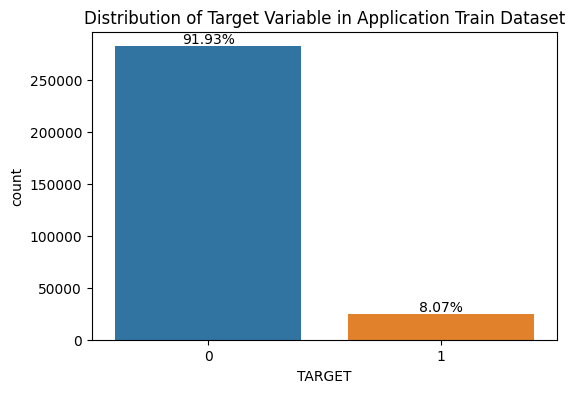

In [6]:
# Checking the target variable in application_train
# Calculating the value counts and percentages for the target variable
target_counts = application_train['TARGET'].value_counts()
target_percentages = target_counts / len(application_train) * 100

# Plotting the countplot for the target variable
plt.figure(figsize=(6, 4))
sns.countplot(x='TARGET', data=application_train)
plt.title('Distribution of Target Variable in Application Train Dataset')

# Annotating the plot with percentages
for i, count in enumerate(target_counts):
    plt.text(i, count, f'{target_percentages[i]:.2f}%', ha='center', va='bottom')

plt.show()

- The `TARGET` variable distribution indicates a significant class imbalance, which is common in risk modeling. Only about 8% of applicants have had payment difficulties, which could lead to a model bias towards predicting the majority class.
- This imbalance has implications for model training and evaluation:
  - It can lead to models that are biased towards predicting the majority class.
  - Accuracy is not a reliable performance metric here; instead, metrics that account for class imbalance like the Area Under the Receiver Operating Characteristic Curve (AUC-ROC) or the F1 score are more appropriate.
  - Balancing techniques may be needed, such as synthetic data generation (SMOTE), class weighting during model training, or targeted resampling methods.

<ipython-input-7-307e86b1a6a3>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = application_train.corr()


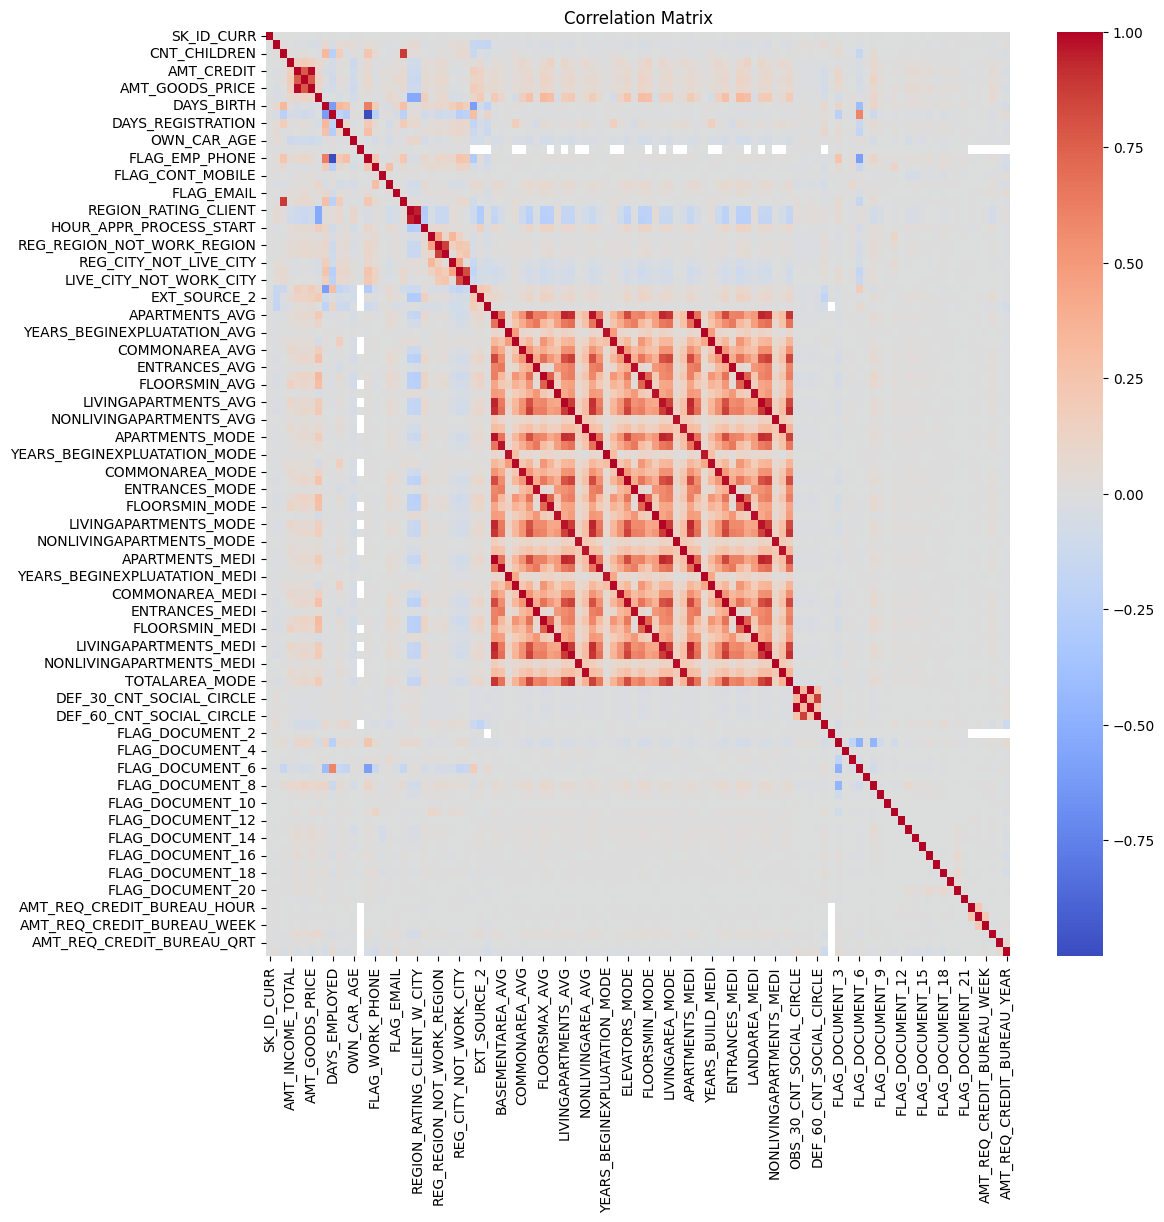

In [7]:
# Correlation matrix
correlation_matrix = application_train.corr()
plt.figure(figsize=(12, 12))
sns.heatmap(correlation_matrix, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

The correlation matrix provides insights into how variables relate to one another:

- **Red Blocks**: These represent variables that move together. If one increases, the other tends to also increase. This could mean that they share a common cause or that one is causing the other to change.
- **Blue Blocks**: These indicate an inverse relationship. As one variable increases, the other decreases. For example, it could be that as a client's age increases, their loan amount decreases.
- **Clusters**: A cluster of red can indicate a group of variables that are all related to each other. This might indicate a certain underlying factor that affects all these variables similarly.
- **Target Correlation**: The columns/rows that correspond to the target variable are of particular interest. High correlation with the target could point to variables that are good predictors for the model.

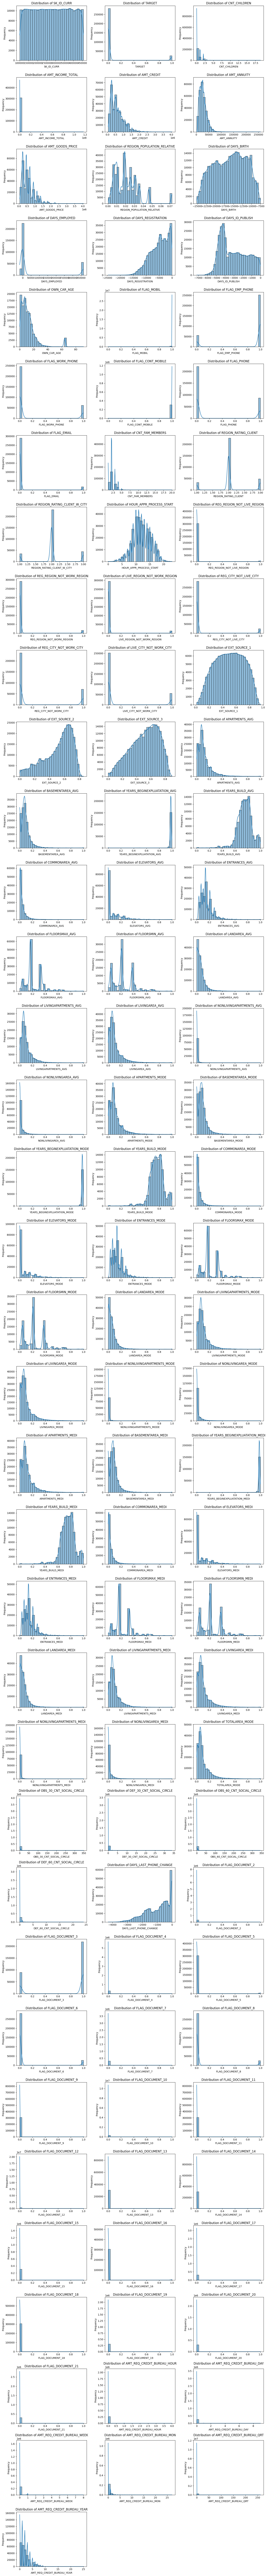

In [8]:
# Distribution of numeric features
numeric_features = application_train.select_dtypes(include=[np.number])

n_cols = 3
n_rows = int(np.ceil(len(numeric_features.columns) / n_cols))
plt.figure(figsize=(n_cols * 5, n_rows * 4))

for i, column in enumerate(numeric_features.columns):
    plt.subplot(n_rows, n_cols, i + 1)
    sns.histplot(numeric_features[column], kde=True, bins=30)
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

The distribution plots for each numeric variable:

- **Central Tendency**: Where the bulk of the data points lie. For example, the majority of clients might fall within a certain income range.
- **Variability**: How spread out the data is. A wide distribution suggests high variability, whereas a narrow peak suggests low variability.
- **Shape**: This includes whether the distribution is symmetrical or skewed (tail is longer on the left/right side). Skewed distributions might require transformation for certain algorithms to perform better.
- **Peaks and Valleys**: Multiple peaks could indicate the presence of different groups within the data. For example, a bimodal income distribution might suggest two distinct economic groups within the client base.

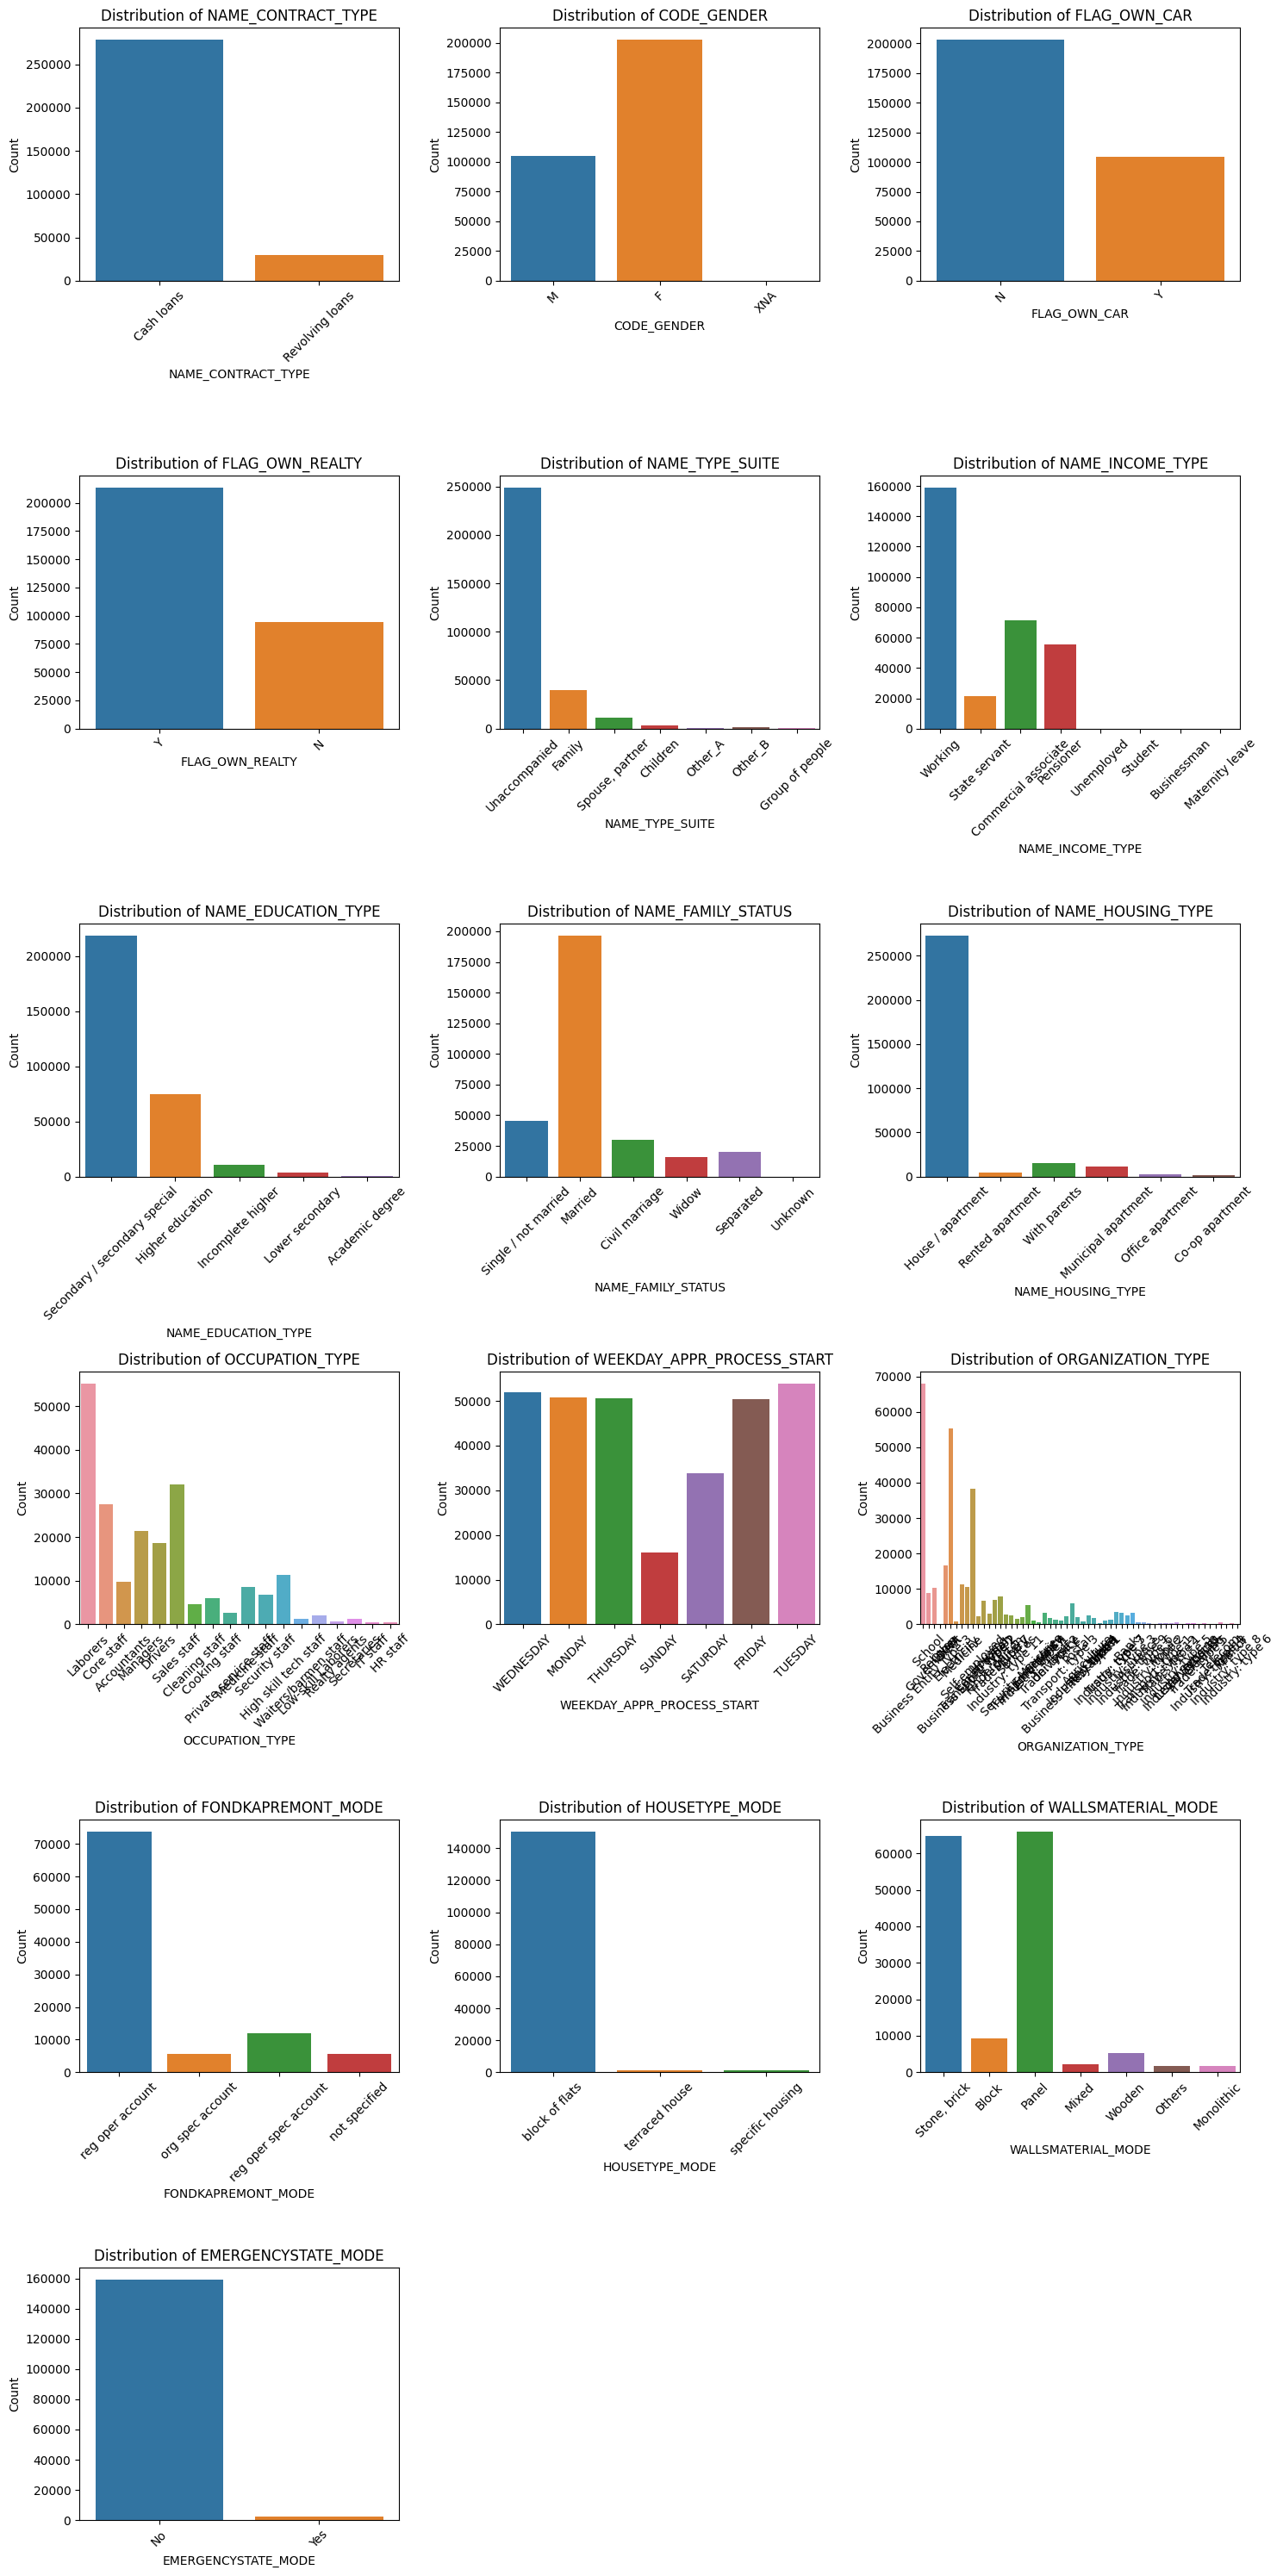

In [9]:
# Distribution of categorical features
categorical_features = application_train.select_dtypes(include=['object'])
n_rows = int(np.ceil(len(categorical_features.columns) / 3))
plt.figure(figsize=(15, n_rows * 5))

for i, column in enumerate(categorical_features.columns):
    plt.subplot(n_rows, 3, i + 1)
    sns.countplot(x=column, data=categorical_features)
    plt.title(f'Distribution of {column}')
    plt.xticks(rotation=45)
    plt.xlabel(column)
    plt.ylabel('Count')

plt.tight_layout()
plt.show()

The distribution plots for each categorical variable:

- **Dominance**: Some categories dominate the feature, such as the majority of loans being 'Cash loans' versus 'Revolving loans'. This dominance could suggest common trends or preferences in the dataset.
- **Rarity**: Some categories might be rare or underrepresented, which can be a challenge when training models since there might not be enough data to learn patterns from these categories.
- **Diversity**: A large number of unique categories in features like occupation or organization type can make it difficult to visualize and understand the data. It also presents challenges in encoding these features for machine learning models, as one-hot encoding can lead to a high-dimensional dataset.

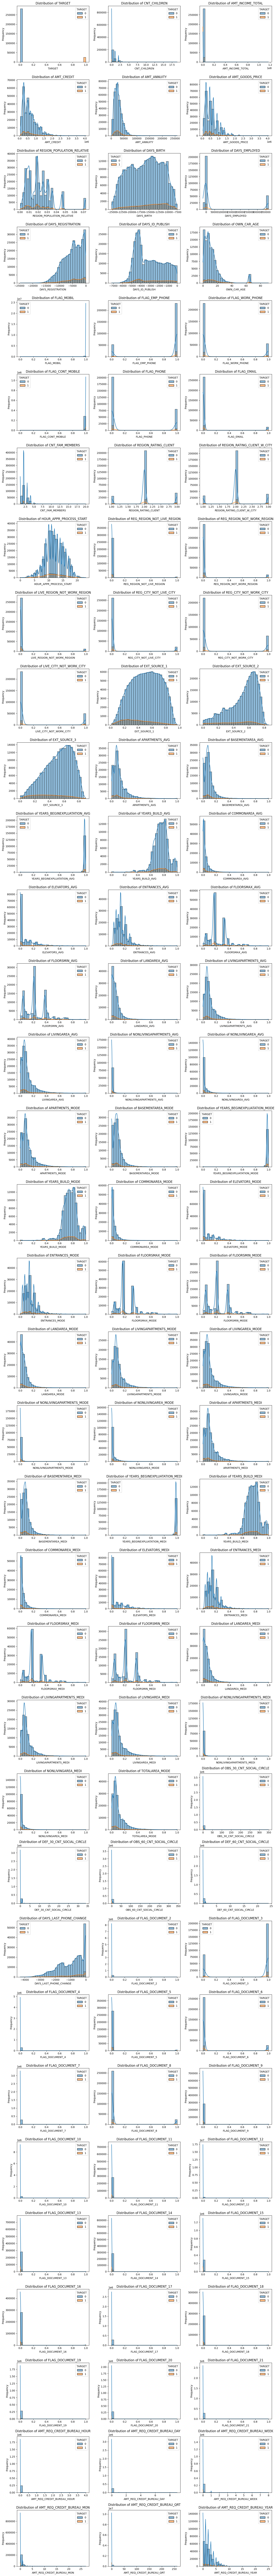

In [10]:
# numeric features in relationship with the target
numeric_features = application_train.select_dtypes(include=[np.number])
numeric_features = numeric_features.drop(columns='SK_ID_CURR')  #ID is not useful for distribution

n_cols = 3
n_rows = int(np.ceil(len(numeric_features.columns) / n_cols))
plt.figure(figsize=(n_cols * 5, n_rows * 4))

for i, column in enumerate(numeric_features.columns):
    plt.subplot(n_rows, n_cols, i + 1)
    sns.histplot(x=numeric_features[column], hue=application_train['TARGET'], kde=True, bins=30)
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

The histograms of numeric features show the distribution of continuous variables, such as income, credit amount, and annuity. These distributions are split by the target variable, which allows for a visual assessment of the differences between the two groups (e.g., those who experienced payment difficulties vs. those who did not). Key observations can be:

- **Skewed Distributions**: Many financial variables (like income or credit amount) often have a right-skewed distribution, indicating a concentration of lower values with a long tail of higher values. This is typical in financial data and may require transformation for certain types of analyses.
- **Overlap Between Classes**: Overlapping distributions suggest that while there may be tendencies for certain values to be associated with one of the target outcomes, there is not a clear-cut boundary that can be used for classification. For instance, while higher incomes might be generally associated with a lower likelihood of payment difficulties, there are still many individuals with high incomes who experience difficulties.
- **Outliers and Variability**: High variability and potential outliers can also be identified in these plots. Outliers may need to be treated specially to prevent them from having an undue influence on model training.

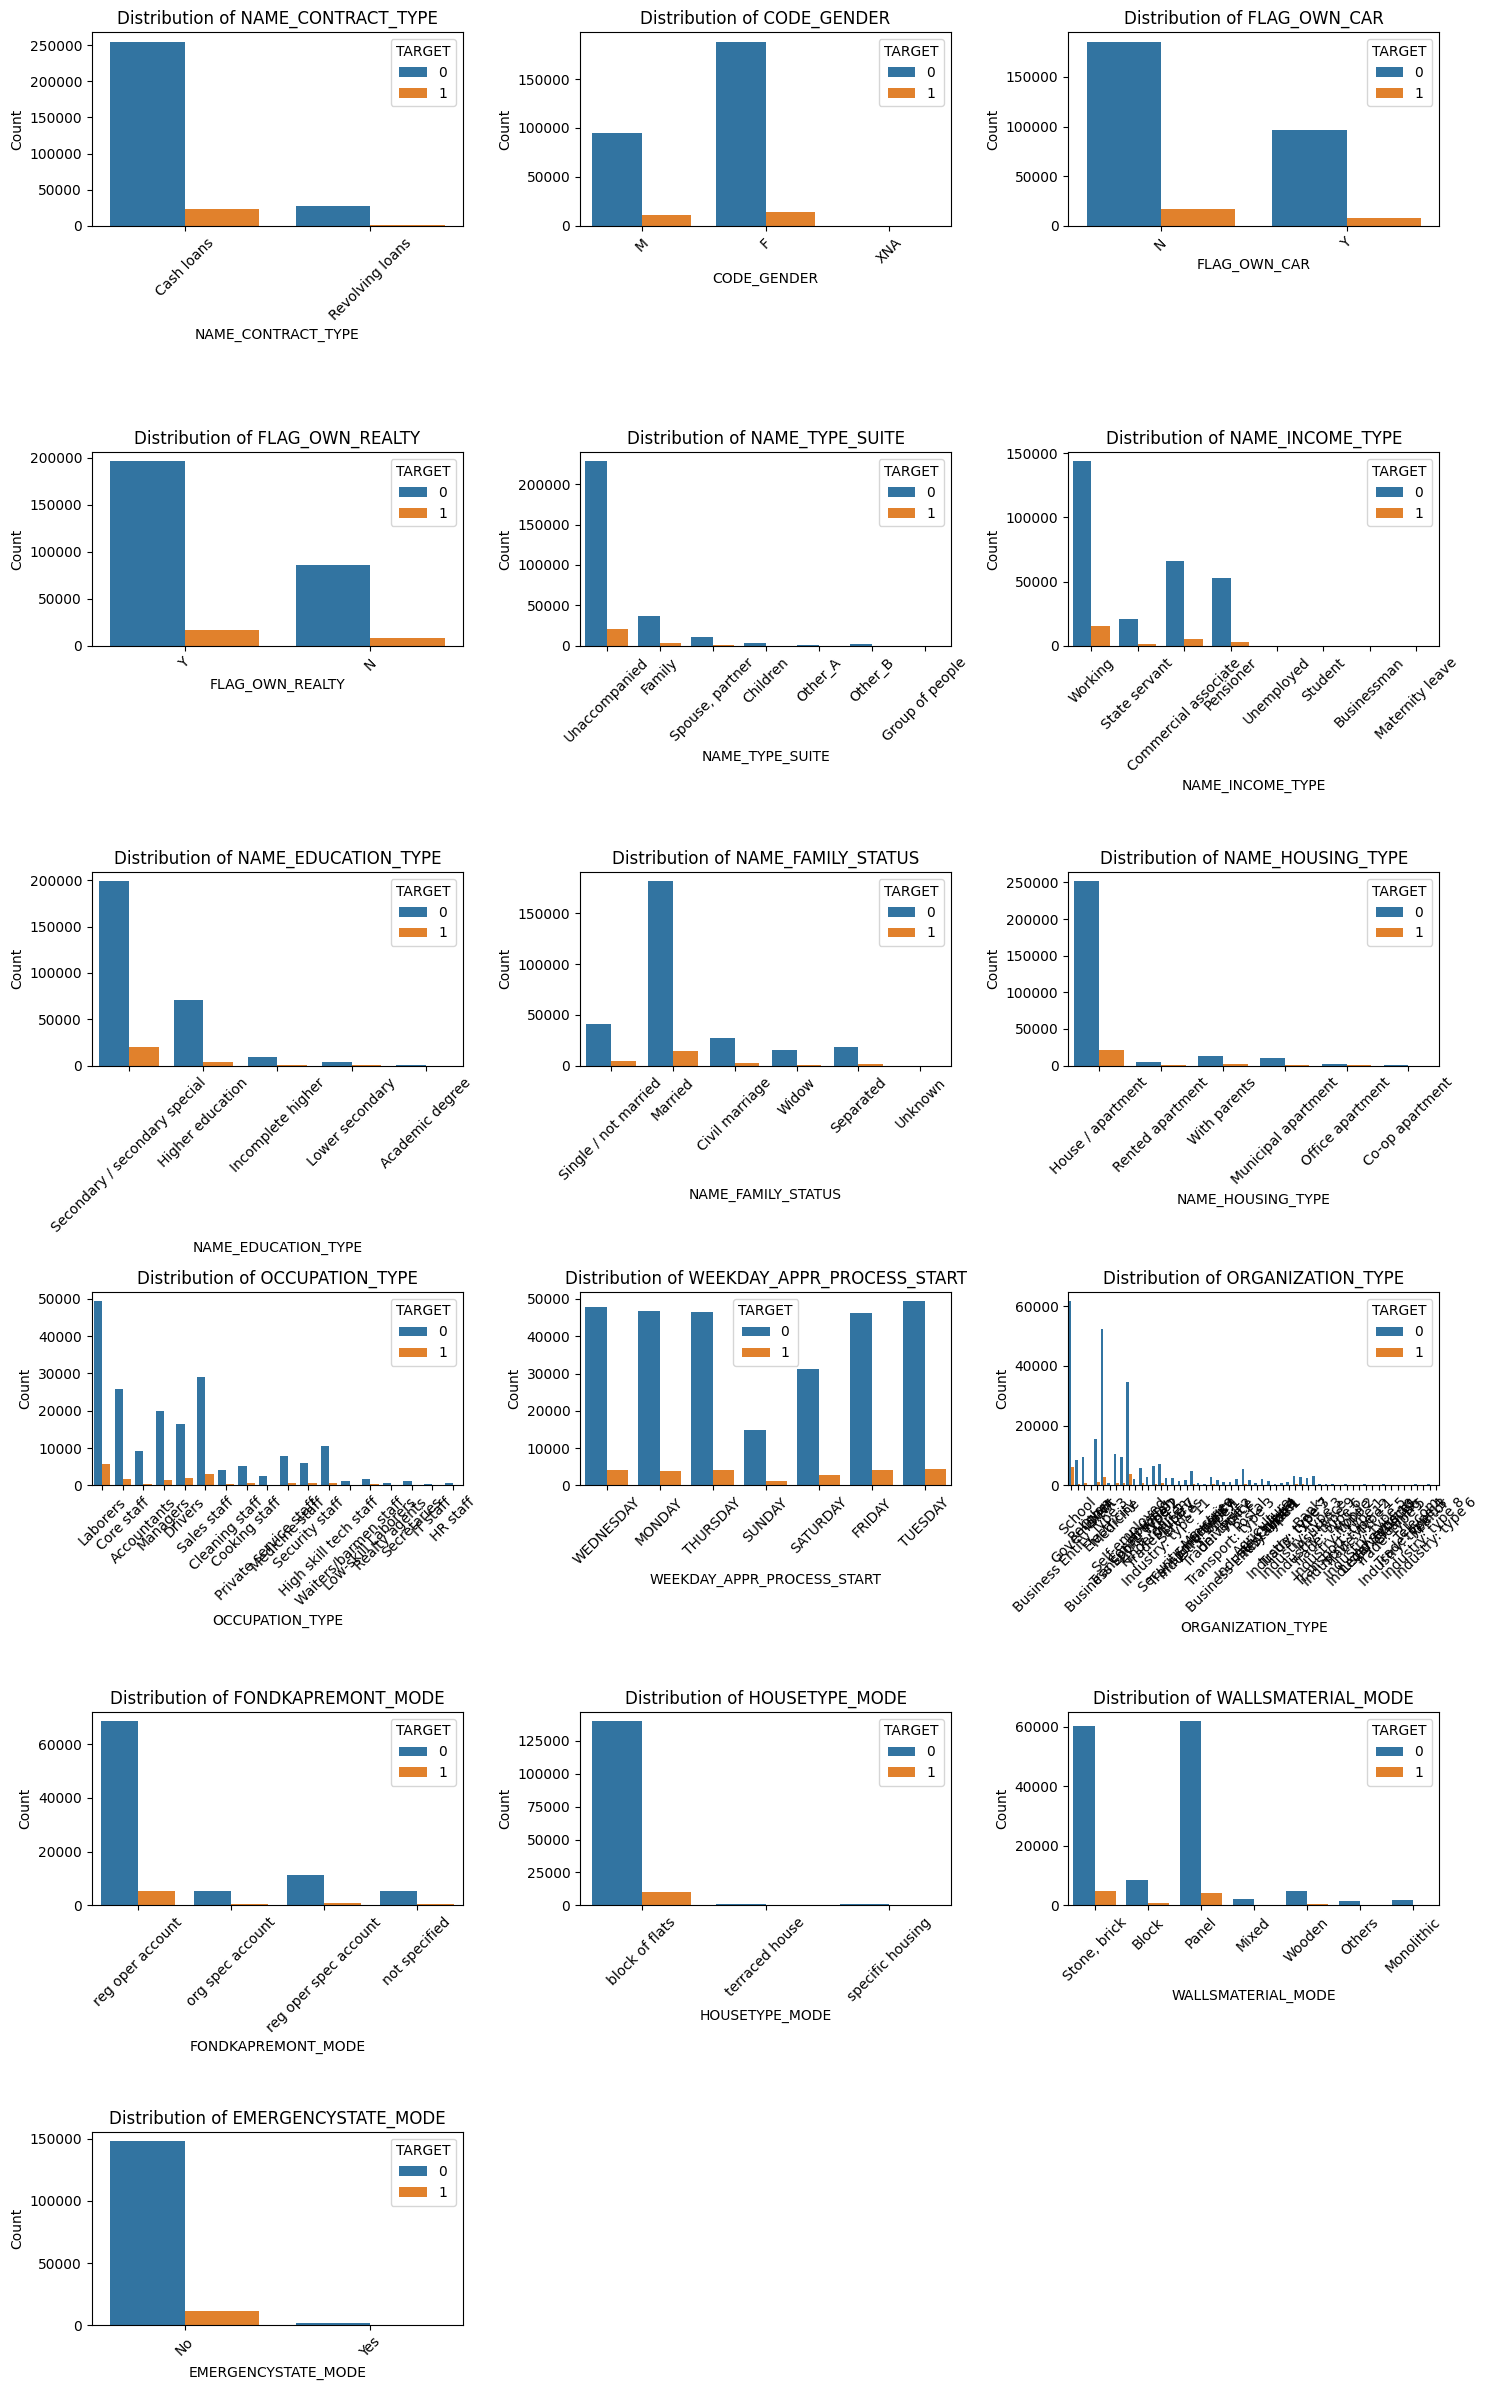

In [11]:
# categorical features in relationship with the target
categorical_features = application_train.select_dtypes(include=['object'])
n_rows = int(np.ceil(len(categorical_features.columns) / n_cols))
plt.figure(figsize=(n_cols * 5, n_rows * 4))

for i, column in enumerate(categorical_features.columns):
    plt.subplot(n_rows, n_cols, i + 1)
    sns.countplot(x=column, hue=application_train['TARGET'], data=application_train)
    plt.title(f'Distribution of {column}')
    plt.xticks(rotation=45)
    plt.xlabel(column)
    plt.ylabel('Count')

plt.tight_layout()
plt.show()

The bar charts for categorical variables provide a count of the number of occurrences of each category, again split by the target variable. Observations might include:

- **Imbalance in Categories**: Some categories may be underrepresented in the data. For example, if the dataset contains more clients without cars, any analysis or model may be less sensitive to variations within clients who own cars.
- **Association with Target**: Certain categories may show a stronger association with the target variable. For instance, the employment type or education level might show different rates of payment difficulties. This could inform feature engineering or provide business insights for risk assessment.
- **Dominant Categories**: If some categories dominate others, it may suggest that the dataset is not balanced and could bias any predictive modeling.

## 2. Data Preprocessing

### Handling Missing Values

In [12]:
from sklearn.impute import SimpleImputer

# Handling Missing values

# Determine the threshold for dropping columns
threshold = 0.2 # drop columns with missing values more than 20%
columns_to_drop = application_train.columns[application_train.isnull().mean() > threshold]

# Drop these columns from the dataframe
application_train = application_train.drop(columns_to_drop, axis=1)

# Now proceed with imputation for the remaining columns
imputer_num = SimpleImputer(strategy='median')
imputer_cat = SimpleImputer(strategy='most_frequent')

numerical_features = application_train.select_dtypes(include=['int64', 'float64'])
categorical_features = application_train.select_dtypes(include=['object'])

application_train[numerical_features.columns] = imputer_num.fit_transform(numerical_features)
application_train[categorical_features.columns] = imputer_cat.fit_transform(categorical_features)

In [13]:
# Checking for missing values
missing_values = application_train.isnull().sum()
total_values = application_train.shape[0]

missing_percentage = (missing_values / total_values) * 100
missing_info = pd.DataFrame({'Total Missing Values': missing_values, 'Percentage': missing_percentage})

print(missing_info)

                             Total Missing Values  Percentage
SK_ID_CURR                                      0         0.0
TARGET                                          0         0.0
NAME_CONTRACT_TYPE                              0         0.0
CODE_GENDER                                     0         0.0
FLAG_OWN_CAR                                    0         0.0
FLAG_OWN_REALTY                                 0         0.0
CNT_CHILDREN                                    0         0.0
AMT_INCOME_TOTAL                                0         0.0
AMT_CREDIT                                      0         0.0
AMT_ANNUITY                                     0         0.0
AMT_GOODS_PRICE                                 0         0.0
NAME_TYPE_SUITE                                 0         0.0
NAME_INCOME_TYPE                                0         0.0
NAME_EDUCATION_TYPE                             0         0.0
NAME_FAMILY_STATUS                              0         0.0
NAME_HOU

Now the dataset has no missing values anymore.

# Stage 2: Feature Engineering and Selection

### Creating New Features

In [15]:
# Create a bureau balance status feature
bureau_balance['STATUS'] = bureau_balance['STATUS'].replace(['C', 'X'], 0)  # Treat 'Closed' and 'Unknown' as 0
bureau_balance['STATUS'] = bureau_balance['STATUS'].astype(int)
bureau_balanced_status = bureau_balance.groupby('SK_ID_BUREAU')['STATUS'].mean().reset_index()
bureau_balanced_status.rename(columns={'STATUS': 'bureau_balanced_status'}, inplace=True)

# Merge with bureau
bureau = bureau.merge(bureau_balanced_status, on='SK_ID_BUREAU', how='left')

# Create a DataFrame for bureau features
bureau_features = bureau.groupby('SK_ID_CURR').agg({
    'bureau_balanced_status': 'mean'  # Average status per client
}).reset_index()

# Create a feature for previous loan counts
previous_loan_counts = previous_application['SK_ID_CURR'].value_counts().reset_index()
previous_loan_counts.rename(columns={'index': 'SK_ID_CURR', 'SK_ID_CURR': 'previous_loan_counts'}, inplace=True)

# Create a feature for average loan type
average_loan_type = previous_application.groupby('SK_ID_CURR').agg({
    'AMT_CREDIT': 'mean'  # Average loan amount
}).reset_index()
average_loan_type.rename(columns={'AMT_CREDIT': 'average_loan_type'}, inplace=True)

# Create a feature for average down payment
average_down_payment = previous_application.groupby('SK_ID_CURR').agg({
    'AMT_DOWN_PAYMENT': 'mean'  # Average down payment
}).reset_index()
average_down_payment.rename(columns={'AMT_DOWN_PAYMENT': 'average_down_payment'}, inplace=True)

# Merge features into a new DataFrame specific to features
features_df = bureau_features.merge(previous_loan_counts, on='SK_ID_CURR', how='left')
features_df = features_df.merge(average_loan_type, on='SK_ID_CURR', how='left')
features_df = features_df.merge(average_down_payment, on='SK_ID_CURR', how='left')

# Replace NaN with 0 for count variables and with median for continuous variables
features_df['previous_loan_counts'].fillna(0, inplace=True)
features_df['bureau_balanced_status'].fillna(0, inplace=True)  # Assuming no balance means status 0
features_df['average_loan_type'].fillna(features_df['average_loan_type'].median(), inplace=True)
features_df['average_down_payment'].fillna(features_df['average_down_payment'].median(), inplace=True)

In [17]:
features_df.head()

SK_ID_CURR  bureau_balanced_status  previous_loan_counts  \
0      100001                0.007519                   1.0   
1      100002                0.255682                   1.0   
2      100003                0.000000                   3.0   
3      100004                0.000000                   1.0   
4      100005                0.000000                   2.0   

   average_loan_type  average_down_payment  
0           23787.00                2520.0  
1          179055.00                   0.0  
2          484191.00                3442.5  
3           20106.00                4860.0  
4           20076.75                4464.0

1. **`bureau_balanced_status`**: This feature appears to be the average status of a client's previous credit as reported by the Credit Bureau, calculated over a period (e.g., the last 6 months from the `bureau_balance` dataset). A lower average suggests that the client has a better credit standing, while a higher average might indicate potential difficulties in paying back credit.

2. **`previous_loan_counts`**: This is the count of previous loan applications a client has made, which is derived from the `previous_application` dataset. It gives an idea of the client's experience with credit products and their demand for credit. A higher count could either indicate that a client is credit-active and possibly a good borrower, or it might suggest that the client is constantly in need of loans, which could be a red flag.

3. **`average_loan_type`**: This feature seems to represent the average loan amount that the client applied for in their previous applications (`AMT_CREDIT` from the `previous_application` dataset). It provides insight into the typical loan size the client is comfortable with or requires, and can be indicative of their financial needs or repayment capacity.

4. **`average_down_payment`**: This feature indicates the average amount of down payment the client has made in their previous loan applications. It is an important feature as it relates directly to the client's upfront financial capabilities and could be a predictor of their commitment to repayment and financial health.

### Feature Selection

In [18]:
# Merge the features into the training data on SK_ID_CURR
merged_train_df = application_train.merge(features_df, on='SK_ID_CURR', how='left')
merged_train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 307511 entries, 0 to 307510
Data columns (total 76 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   SK_ID_CURR                   307511 non-null  float64
 1   TARGET                       307511 non-null  float64
 2   NAME_CONTRACT_TYPE           307511 non-null  object 
 3   CODE_GENDER                  307511 non-null  object 
 4   FLAG_OWN_CAR                 307511 non-null  object 
 5   FLAG_OWN_REALTY              307511 non-null  object 
 6   CNT_CHILDREN                 307511 non-null  float64
 7   AMT_INCOME_TOTAL             307511 non-null  float64
 8   AMT_CREDIT                   307511 non-null  float64
 9   AMT_ANNUITY                  307511 non-null  float64
 10  AMT_GOODS_PRICE              307511 non-null  float64
 11  NAME_TYPE_SUITE              307511 non-null  object 
 12  NAME_INCOME_TYPE             307511 non-null  object 
 13 

In [40]:
selected_columns = [
    'SK_ID_CURR',
    'TARGET',
    'NAME_CONTRACT_TYPE',
    'CODE_GENDER',
    'FLAG_OWN_CAR',
    'FLAG_OWN_REALTY',
    'CNT_CHILDREN',
    'AMT_INCOME_TOTAL',
    'AMT_CREDIT',
    'AMT_ANNUITY',
    'AMT_GOODS_PRICE',
    'NAME_EDUCATION_TYPE',
    'NAME_INCOME_TYPE',
    'DAYS_BIRTH',
    'DAYS_EMPLOYED',
    'EXT_SOURCE_2',
    'EXT_SOURCE_3',
    'REGION_RATING_CLIENT',
    'REGION_RATING_CLIENT_W_CITY',
    'ORGANIZATION_TYPE',
    'OBS_30_CNT_SOCIAL_CIRCLE',
    'DEF_30_CNT_SOCIAL_CIRCLE',
    'DAYS_LAST_PHONE_CHANGE',
    'bureau_balanced_status',
    'previous_loan_counts',
    'average_loan_type',
    'average_down_payment'
]

final_df = merged_train_df[selected_columns]
final_df.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0    100002.0     1.0         Cash loans           M            N   
1    100003.0     0.0         Cash loans           F            N   
2    100004.0     0.0    Revolving loans           M            Y   
3    100006.0     0.0         Cash loans           F            N   
4    100007.0     0.0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y           0.0          202500.0    406597.5      24700.5   
1               N           0.0          270000.0   1293502.5      35698.5   
2               Y           0.0           67500.0    135000.0       6750.0   
3               Y           0.0          135000.0    312682.5      29686.5   
4               Y           0.0          121500.0    513000.0      21865.5   

   AMT_GOODS_PRICE            NAME_EDUCATION_TYPE NAME_INCOME_TYPE  \
0         351000.0  Secondary / secondary special          Working   
1        1129500.0               Higher education    State servant   
2         135000.0  Secondary / secondary special          Working   
3         297000.0  Secondary / secondary special          Working   
4         513000.0  Secondary / secondary special          Working   

   DAYS_BIRTH  DAYS_EMPLOYED  EXT_SOURCE_2  EXT_SOURCE_3  \
0     -9461.0         -637.0      0.262949      0.139376   
1    -16765.0        -1188.0      0.622246      0.535276   
2    -19046.0         -225.0      0.555912      0.729567   
3    -19005.0        -3039.0      0.650442      0.535276   
4    -19932.0        -3038.0      0.322738      0.535276   

   REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY       ORGANIZATION_TYPE  \
0                   2.0                          2.0  Business Entity Type 3   
1                   1.0                          1.0                  School   
2                   2.0                          2.0              Government   
3                   2.0                          2.0  Business Entity Type 3   
4                   2.0                          2.0                Religion   

   OBS_30_CNT_SOCIAL_CIRCLE  DEF_30_CNT_SOCIAL_CIRCLE  DAYS_LAST_PHONE_CHANGE  \
0                       2.0                       2.0                 -1134.0   
1                       1.0                       0.0                  -828.0   
2                       0.0                       0.0                  -815.0   
3                       2.0                       0.0                  -617.0   
4                       0.0                       0.0                 -1106.0   

   bureau_balanced_status  previous_loan_counts  average_loan_type  \
0                0.255682                   1.0          179055.00   
1                0.000000                   3.0          484191.00   
2                0.000000                   1.0           20106.00   
3                     NaN                   NaN                NaN   
4                0.000000                   6.0          166638.75   

   average_down_payment  
0                  0.00  
1               3442.50  
2               4860.00  
3                   NaN  
4               3390.75

Here are the selected features:

1. **SK_ID_CURR**: Unique identifier for each loan application (necessary for tracking but not used in modeling).

2. **TARGET**: Dependent variable, indicating payment difficulties.

3. **NAME_CONTRACT_TYPE**: Type of loan can affect the likelihood of repayment.

4. **CODE_GENDER**: Gender might show different risk patterns.

5. **FLAG_OWN_CAR, FLAG_OWN_REALTY**: Owning assets could indicate financial stability.

6. **CNT_CHILDREN, CNT_FAM_MEMBERS**: Family size could affect payment ability.

7. **AMT_INCOME_TOTAL, AMT_CREDIT, AMT_ANNUITY, AMT_GOODS_PRICE**: Financial amounts related to the loan and income are directly related to the ability to repay.

8. **NAME_EDUCATION_TYPE**: Education level can be an indicator of earning potential.

9. **NAME_INCOME_TYPE**: Source of income might affect stability and thus ability to repay.

10. **DAYS_BIRTH, DAYS_EMPLOYED**: Age and length of employment can be indicative of financial stability.

11. **EXT_SOURCE_2, EXT_SOURCE_3**: External data sources are often predictive of creditworthiness.

12. **REGION_RATING_CLIENT, REGION_RATING_CLIENT_W_CITY**: Regional assessments can be proxies for socioeconomic status.

13. **ORGANIZATION_TYPE**: The sector of employment may affect income stability.

14. **OBS_30_CNT_SOCIAL_CIRCLE, DEF_30_CNT_SOCIAL_CIRCLE**: Social environment can impact financial behavior.

15. **DAYS_LAST_PHONE_CHANGE**: Frequency of changing phone might be an indirect signal of financial stability or personal behavior.

16. **bureau_balanced_status**: Represents a feature engineered from bureau balance, likely indicating overall financial health.

17. **previous_loan_counts**: A count of previous loans could indicate credit history depth.

18. **average_loan_type**: Average loan type might show the kind of financial products the customer is using, which can be indicative of financial behavior.

19. **average_down_payment**: Higher down payments might correlate with better loan repayment performance.

The selected features include both individual characteristics (like age, gender, income), credit history (like previous loan counts, credit bureau data), and loan specifics (like loan type, amount, and annuity). They are chosen based on common sense, financial understanding, and their potential predictive power for the target variable.

### Data Preprocessing

In [22]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

# Define categorical columns which need to be encoded
categorical_cols = final_df.select_dtypes(include=['object']).columns.tolist()

# Define numerical columns which need to be scaled
numerical_cols = final_df.select_dtypes(exclude=['object']).columns.tolist()
# Remove 'SK_ID_CURR' and 'TARGET' from the numerical columns list
numerical_cols.remove('SK_ID_CURR')
numerical_cols.remove('TARGET')

# Preprocessing for categorical data
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Preprocessing for numerical data
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

# Bundle preprocessing for numerical and categorical data
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
])

# Stage 3: Model Development

### Model with no handling class imbalance

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

# Split final_df into X and y
X = final_df.drop(['TARGET', 'SK_ID_CURR'], axis=1)
y = final_df['TARGET']

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Instantiate the models
logistic_model = LogisticRegression(random_state=42)
random_forest_model = RandomForestClassifier(random_state=42, n_jobs=-1)

# Create pipelines with preprocessing and model
pipeline_logistic = Pipeline(steps=[('preprocessor', preprocessor),
                                    ('model', logistic_model)])

pipeline_random_forest = Pipeline(steps=[('preprocessor', preprocessor),
                                         ('model', random_forest_model)])

In [23]:
# Fit the logistic regression model
pipeline_logistic.fit(X_train, y_train)

# Fit the random forest model
pipeline_random_forest.fit(X_train, y_train)

# Predict using logistic regression
y_pred_logistic = pipeline_logistic.predict(X_test)

# Predict using random forest
y_pred_random_forest = pipeline_random_forest.predict(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [24]:
# Evaluation metrics for logistic regression
print("Logistic Regression Classification Report:\n", classification_report(y_test, y_pred_logistic))
print("Logistic Regression Confusion Matrix:\n", confusion_matrix(y_test, y_pred_logistic))

Logistic Regression Classification Report:
               precision    recall  f1-score   support

         0.0       0.92      1.00      0.96     56554
         1.0       0.51      0.01      0.02      4949

    accuracy                           0.92     61503
   macro avg       0.72      0.51      0.49     61503
weighted avg       0.89      0.92      0.88     61503

Logistic Regression Confusion Matrix:
 [[56501    53]
 [ 4893    56]]


In [25]:
# Evaluation metrics for random forest
print("Random Forest Classification Report:\n", classification_report(y_test, y_pred_random_forest))
print("Random Forest Confusion Matrix:\n", confusion_matrix(y_test, y_pred_random_forest))

Random Forest Classification Report:
               precision    recall  f1-score   support

         0.0       0.92      1.00      0.96     56554
         1.0       0.58      0.00      0.01      4949

    accuracy                           0.92     61503
   macro avg       0.75      0.50      0.48     61503
weighted avg       0.89      0.92      0.88     61503

Random Forest Confusion Matrix:
 [[56543    11]
 [ 4934    15]]


### Model with handling class imbalance

In [26]:
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as ImbPipeline
from sklearn.metrics import roc_auc_score

# Define the SMOTE object
smote = SMOTE(random_state=42)

# Modify the pipelines to include SMOTE
pipeline_logistic_smote = ImbPipeline(steps=[('preprocessor', preprocessor),
                                             ('smote', smote),
                                             ('model', logistic_model)])

pipeline_random_forest_smote = ImbPipeline(steps=[('preprocessor', preprocessor),
                                                  ('smote', smote),
                                                  ('model', random_forest_model)])

In [ ]:
# Fit the logistic regression model with SMOTE
pipeline_logistic_smote.fit(X_train, y_train)

# Fit the random forest model with SMOTE
pipeline_random_forest_smote.fit(X_train, y_train)

# Predict probabilities using logistic regression
y_prob_logistic = pipeline_logistic_smote.predict_proba(X_test)[:, 1]

# Predict probabilities using random forest
y_prob_random_forest = pipeline_random_forest_smote.predict_proba(X_test)[:, 1]

# Predict using logistic regression
y_pred_logistic_smote = pipeline_logistic_smote.predict(X_test)

# Predict using random forest
y_pred_random_forest_smote = pipeline_random_forest_smote.predict(X_test)

In [ ]:
# Evaluation metrics for logistic regression with SMOTE
print("Logistic Regression with SMOTE Classification Report:\n", classification_report(y_test, y_pred_logistic_smote))
print("Logistic Regression with SMOTE Confusion Matrix:\n", confusion_matrix(y_test, y_pred_logistic_smote))
print("Logistic Regression with SMOTE ROC AUC Score:", roc_auc_score(y_test, y_prob_logistic))

In [ ]:
# Evaluation metrics for random forest with SMOTE
print("Random Forest with SMOTE Classification Report:\n", classification_report(y_test, y_pred_random_forest_smote))
print("Random Forest with SMOTE Confusion Matrix:\n", confusion_matrix(y_test, y_pred_random_forest_smote))
print("Random Forest with SMOTE ROC AUC Score:", roc_auc_score(y_test, y_prob_random_forest))

# Stage 4: Model Evaluation and Business Interpretation

In [28]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

def classification_evaluation(y_true, y_pred, y_prob):
    results = {}
    results['Accuracy'] = round(accuracy_score(y_true, y_pred), 3)
    results['Precision'] = round(precision_score(y_true, y_pred), 3)
    results['Recall'] = round(recall_score(y_true, y_pred), 3)
    results['F1 Score'] = round(f1_score(y_true, y_pred), 3)
    results['ROC AUC'] = round(roc_auc_score(y_true, y_prob[:, 1]), 3)

    return results

from sklearn.metrics import roc_curve, auc, precision_recall_curve, confusion_matrix

def plot_classification_evaluation(y_true, y_pred, y_prob):
    # ROC and AUC
    fpr, tpr, _ = roc_curve(y_true, y_prob[:, 1])
    roc_auc = auc(fpr, tpr)

    # Precision-Recall Curve
    precision, recall, _ = precision_recall_curve(y_true, y_prob[:, 1])

    # Confusion Matrix
    conf_matrix = confusion_matrix(y_true, y_pred)

    # Plotting
    fig, ax = plt.subplots(1, 3, figsize=(18,5))

    # Plot ROC
    ax[0].plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
    ax[0].plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    ax[0].set_xlim([0.0, 1.0])
    ax[0].set_ylim([0.0, 1.05])
    ax[0].set_xlabel('False Positive Rate')
    ax[0].set_ylabel('True Positive Rate')
    ax[0].set_title('Receiver Operating Characteristic (ROC)')
    ax[0].legend(loc="lower right")

    # Plot Precision-Recall
    ax[1].plot(recall, precision, color='blue', lw=2)
    ax[1].set_xlim([0.0, 1.0])
    ax[1].set_ylim([0.0, 1.05])
    ax[1].set_xlabel('Recall')
    ax[1].set_ylabel('Precision')
    ax[1].set_title('Precision-Recall Curve')

    # Plot Confusion Matrix
    sns.heatmap(conf_matrix, annot=True, fmt='g', cmap='Blues', ax=ax[2])
    ax[2].set_xlabel('Predicted labels')
    ax[2].set_ylabel('True labels')
    ax[2].set_title('Confusion Matrix')

    plt.tight_layout()
    plt.show()

In [ ]:
classification_evaluation(y_test, y_pred_logistic, y_prob_logistic)

In [ ]:
plot_classification_evaluation(y_test, y_pred_logistic, y_prob_logistic)

In [14]:
classification_evaluation(y_test, y_pred_random_forest, y_prob_random_forest)

In [ ]:
plot_classification_evaluation(y_test, y_pred_random_forest, y_prob_random_forest)

In [30]:
def show_feature_importance(model):
    feat_importances = pd.Series(model.feature_importances_, index=X_train.columns)
    ax = feat_importances.nlargest(25).plot(kind='barh', figsize=(9, 6))
    ax.invert_yaxis()

    plt.xlabel('Importance')
    plt.ylabel('Feature')
    plt.title('Feature Importance')

def show_feature_importance_2(model):
    feat_importances = pd.Series(abs(model.coef_[0]), index=X_train.columns)
    ax = feat_importances.nlargest(25).plot(kind='barh', figsize=(9, 6))
    ax.invert_yaxis()

    plt.xlabel('Absolute Coefficient')
    plt.ylabel('Feature')
    plt.title('Feature Importance')

In [ ]:
show_feature_importance_2(pipeline_logistic)

In [ ]:
show_feature_importance(pipeline_random_forest)

In [34]:
!pip install shap -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 533.5/533.5 kB 4.8 MB/s eta 0:00:00


In [ ]:
import shap

def shap_plot(model):
    explainer = shap.TreeExplainer(model)
    shap_values = explainer.shap_values(X_test)
    shap.summary_plot(shap_values, X_test, plot_size=(10, 5))

def shap_plot_2(model):
    explainer = shap.TreeExplainer(model)
    shap_values = explainer.shap_values(X_test)
    shap.summary_plot(shap_values[1], X_test, plot_size=(10, 5))

In [ ]:
shap_plot_2(pipeline_logistic_smote)

In [ ]:
shap_plot(pipeline_random_forest_smote)

In [42]:
final_df.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0    100002.0     1.0         Cash loans           M            N   
1    100003.0     0.0         Cash loans           F            N   
2    100004.0     0.0    Revolving loans           M            Y   
3    100006.0     0.0         Cash loans           F            N   
4    100007.0     0.0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y           0.0          202500.0    406597.5      24700.5   
1               N           0.0          270000.0   1293502.5      35698.5   
2               Y           0.0           67500.0    135000.0       6750.0   
3               Y           0.0          135000.0    312682.5      29686.5   
4               Y           0.0          121500.0    513000.0      21865.5   

   AMT_GOODS_PRICE            NAME_EDUCATION_TYPE NAME_INCOME_TYPE  \
0         351000.0  Secondary / secondary special          Working   
1        1129500.0               Higher education    State servant   
2         135000.0  Secondary / secondary special          Working   
3         297000.0  Secondary / secondary special          Working   
4         513000.0  Secondary / secondary special          Working   

   DAYS_BIRTH  DAYS_EMPLOYED  EXT_SOURCE_2  EXT_SOURCE_3  \
0     -9461.0         -637.0      0.262949      0.139376   
1    -16765.0        -1188.0      0.622246      0.535276   
2    -19046.0         -225.0      0.555912      0.729567   
3    -19005.0        -3039.0      0.650442      0.535276   
4    -19932.0        -3038.0      0.322738      0.535276   

   REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY       ORGANIZATION_TYPE  \
0                   2.0                          2.0  Business Entity Type 3   
1                   1.0                          1.0                  School   
2                   2.0                          2.0              Government   
3                   2.0                          2.0  Business Entity Type 3   
4                   2.0                          2.0                Religion   

   OBS_30_CNT_SOCIAL_CIRCLE  DEF_30_CNT_SOCIAL_CIRCLE  DAYS_LAST_PHONE_CHANGE  \
0                       2.0                       2.0                 -1134.0   
1                       1.0                       0.0                  -828.0   
2                       0.0                       0.0                  -815.0   
3                       2.0                       0.0                  -617.0   
4                       0.0                       0.0                 -1106.0   

   bureau_balanced_status  previous_loan_counts  average_loan_type  \
0                0.255682                   1.0          179055.00   
1                0.000000                   3.0          484191.00   
2                0.000000                   1.0           20106.00   
3                     NaN                   NaN                NaN   
4                0.000000                   6.0          166638.75   

   average_down_payment  
0                  0.00  
1               3442.50  
2               4860.00  
3                   NaN  
4               3390.75

In [47]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer

# Define categorical columns which need to be encoded
categorical_features = final_df.select_dtypes(include=['object']).columns.tolist()

# Define numerical columns which need to be scaled
numerical_features = final_df.select_dtypes(exclude=['object']).columns.tolist()

# Split final_df into X and y
X = final_df.drop(['TARGET'], axis=1)
y = final_df['TARGET']

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Verify that all categorical_features are in the dataframe
X_train[categorical_features].head()

NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR FLAG_OWN_REALTY  \
123473         Cash loans           F            Y               N   
10118          Cash loans           M            N               Y   
64716          Cash loans           M            Y               Y   
234940         Cash loans           M            Y               Y   
236051         Cash loans           M            N               Y   

                  NAME_EDUCATION_TYPE      NAME_INCOME_TYPE  \
123473  Secondary / secondary special             Pensioner   
10118   Secondary / secondary special               Working   
64716                 Lower secondary               Working   
234940  Secondary / secondary special  Commercial associate   
236051  Secondary / secondary special  Commercial associate   

             ORGANIZATION_TYPE  
123473                     XNA  
10118   Business Entity Type 2  
64716            Self-employed  
234940           Trade: type 3  
236051       Industry: type 11

In [50]:
# Remove 'TARGET' from the numerical columns list if it's still present
if 'TARGET' in numerical_features:
    numerical_features.remove('TARGET')

# Now verify that all numerical_features are in the dataframe
X_train[numerical_features].head()


SK_ID_CURR  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
123473    243191.0           0.0          171000.0    555273.0      16366.5   
10118     111778.0           1.0          157500.0    198085.5      23638.5   
64716     175057.0           0.0          135000.0    776304.0      25173.0   
234940    372147.0           1.0          164133.0    900000.0      36787.5   
236051    373412.0           0.0          225000.0    533668.5      21294.0   

        AMT_GOODS_PRICE  DAYS_BIRTH  DAYS_EMPLOYED  EXT_SOURCE_2  \
123473         463500.0    -23349.0       365243.0      0.358568   
10118          171000.0    -10921.0         -117.0      0.490305   
64716          648000.0    -23213.0        -2157.0      0.643404   
234940         900000.0    -10703.0        -2530.0      0.426431   
236051         477000.0    -15798.0        -3520.0      0.445701   

        EXT_SOURCE_3  REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  \
123473      0.563835                   2.0                          2.0   
10118       0.595456                   2.0                          2.0   
64716       0.706205                   2.0                          2.0   
234940      0.506484                   2.0                          2.0   
236051      0.528093                   2.0                          2.0   

        OBS_30_CNT_SOCIAL_CIRCLE  DEF_30_CNT_SOCIAL_CIRCLE  \
123473                       0.0                       0.0   
10118                        1.0                       0.0   
64716                        2.0                       0.0   
234940                       0.0                       0.0   
236051                       6.0                       1.0   

        DAYS_LAST_PHONE_CHANGE  bureau_balanced_status  previous_loan_counts  \
123473                 -2058.0                0.004808                   7.0   
10118                    -73.0                0.000000                   4.0   
64716                  -1959.0                0.000000                  18.0   
234940                  -531.0                0.000000                  15.0   
236051                    -9.0                0.000000                   3.0   

        average_loan_type  average_down_payment  
123473      113882.785714           3925.125000  
10118        91293.750000           2773.125000  
64716        80690.750000           2835.346154  
234940      176966.040000           7667.000000  
236051      105948.000000              0.000000

In [52]:
# Import necessary libraries
from sklearn.model_selection import train_test_split

# Create transformers for preprocessing the data
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder())
])

numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

# Bundle preprocessing for numerical and categorical data
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
])

# Define the Logistic Regression model with increased max_iter
model = LogisticRegression(max_iter=1000)

# Create a pipeline that first preprocesses the data then fits the model
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('classifier', model)])

# Fit the pipeline on the training data
pipeline.fit(X_train, y_train)

# Get the feature names after one-hot encoding
feature_names = list(pipeline.named_steps['preprocessor'].transformers_[1][1]\
                     .named_steps['onehot'].get_feature_names_out(input_features=categorical_features))

# Adding numerical feature names to the list
feature_names.extend(numerical_features)

# Check feature importance (coefficients) for Logistic Regression
if 'classifier' in pipeline.named_steps:
    if hasattr(pipeline.named_steps['classifier'], 'coef_'):
        importances = pipeline.named_steps['classifier'].coef_[0]
        feature_importances = pd.DataFrame({'feature': feature_names, 'importance': importances})
        print(feature_importances.head())
    else:
        print("The classifier does not expose \"coef_\" attribute.")


                              feature  importance
0       NAME_CONTRACT_TYPE_Cash loans   -0.004910
1  NAME_CONTRACT_TYPE_Revolving loans    0.002105
2                       CODE_GENDER_F   -0.046119
3                       CODE_GENDER_M    0.933896
4                     CODE_GENDER_XNA    0.154006


In [53]:
# Get the coefficients from the logistic regression estimator
coefficients = pipeline.named_steps['classifier'].coef_[0]

# Create a DataFrame for feature importances
feature_importances = pd.DataFrame({
    'Feature': feature_names,
    'Importance': coefficients
})

# Display the feature importances
print(feature_importances.sort_values(by='Importance', ascending=False))


                                              Feature  Importance
7                                   FLAG_OWN_REALTY_N    3.551203
40                ORGANIZATION_TYPE_Industry: type 13    1.295314
34                            ORGANIZATION_TYPE_Hotel    1.182394
37                ORGANIZATION_TYPE_Industry: type 10    1.179792
35                          ORGANIZATION_TYPE_Housing    0.982539
3                                       CODE_GENDER_M    0.933896
77                ORGANIZATION_TYPE_Transport: type 4    0.810777
95                             bureau_balanced_status    0.769605
70                    ORGANIZATION_TYPE_Trade: type 4    0.449056
48                 ORGANIZATION_TYPE_Industry: type 9    0.432069
79                              ORGANIZATION_TYPE_XNA    0.416476
31                      ORGANIZATION_TYPE_Electricity    0.407945
73                    ORGANIZATION_TYPE_Trade: type 7    0.391590
55                            ORGANIZATION_TYPE_Other    0.364899
83        

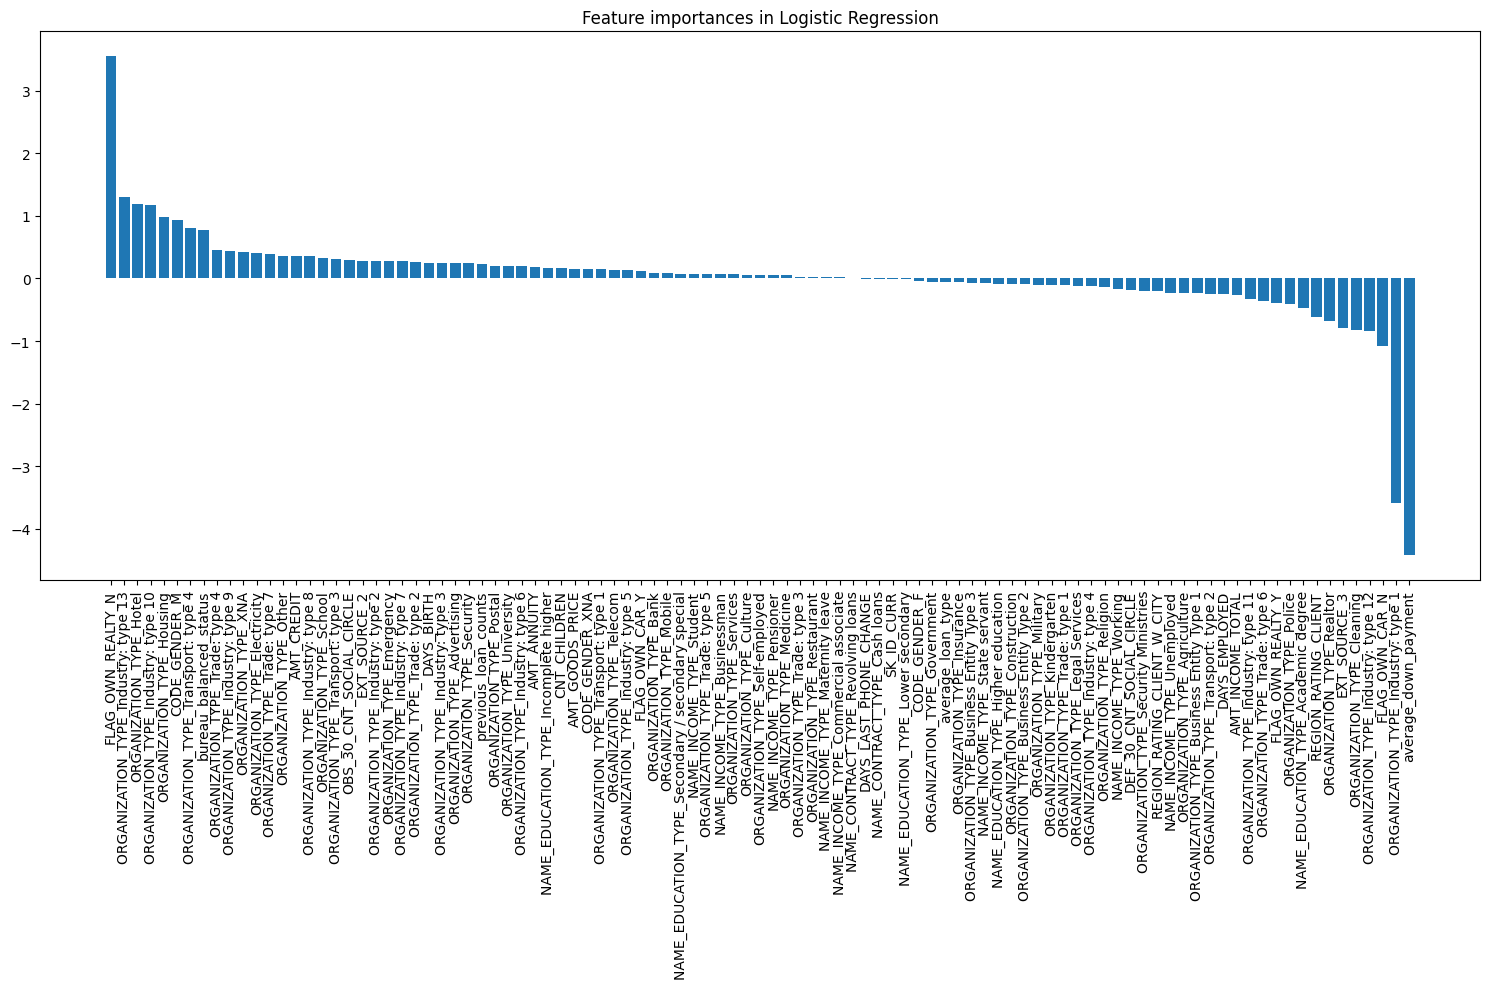

In [56]:
import matplotlib.pyplot as plt
import shap

# Assuming your pipeline and model are already fitted as in the previous code snippet

# Plot feature importances
if hasattr(pipeline.named_steps['classifier'], 'coef_'):
    # Get the coefficients
    importances = pipeline.named_steps['classifier'].coef_[0]
    indices = np.argsort(importances)[::-1]

    # Summarize feature importances
    plt.figure(figsize=(15, 10))
    plt.title("Feature importances in Logistic Regression")
    plt.bar(range(len(indices)), importances[indices])
    plt.xticks(range(len(indices)), [feature_names[i] for i in indices], rotation=90)
    plt.tight_layout()
    plt.show()
else:
    print("The logistic regression model does not have feature importances.")



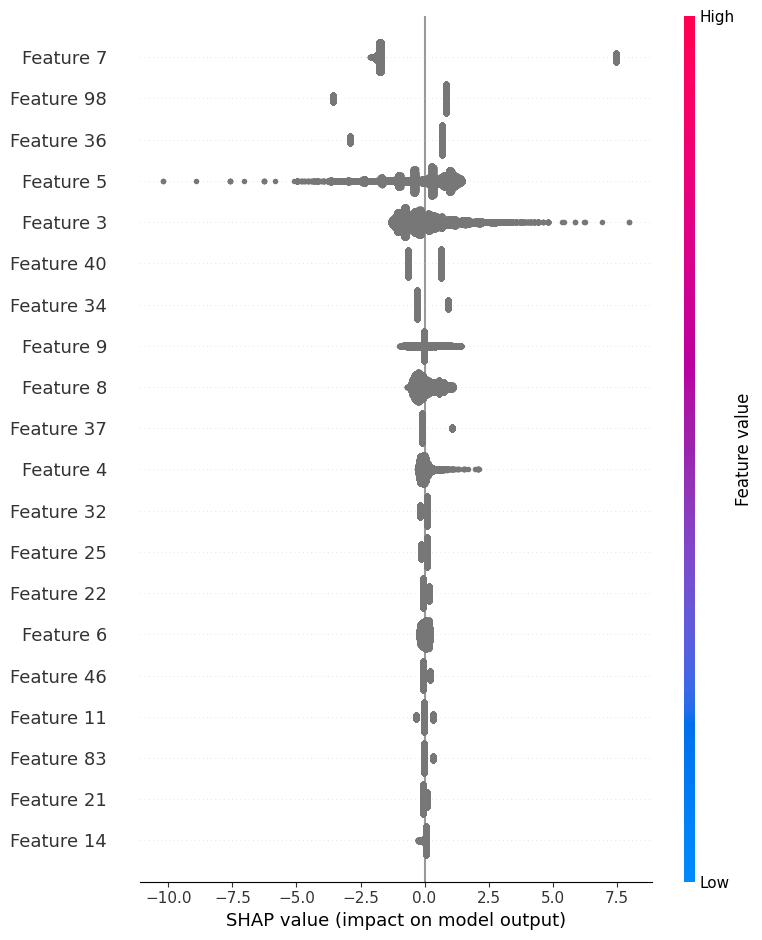

In [58]:
# Transform the data using the pipeline's preprocessor
X_train_transformed = pipeline.named_steps['preprocessor'].transform(X_train)
X_test_transformed = pipeline.named_steps['preprocessor'].transform(X_test)

# Fit the explainer
explainer = shap.Explainer(pipeline.named_steps['classifier'], X_train_transformed)

# Calculate SHAP values for the test set
shap_values = explainer(X_test_transformed)

# Plot SHAP values
shap.initjs()

# If you encounter issues with force_plot, try simplifying to a summary plot
shap.summary_plot(shap_values, X_test_transformed)


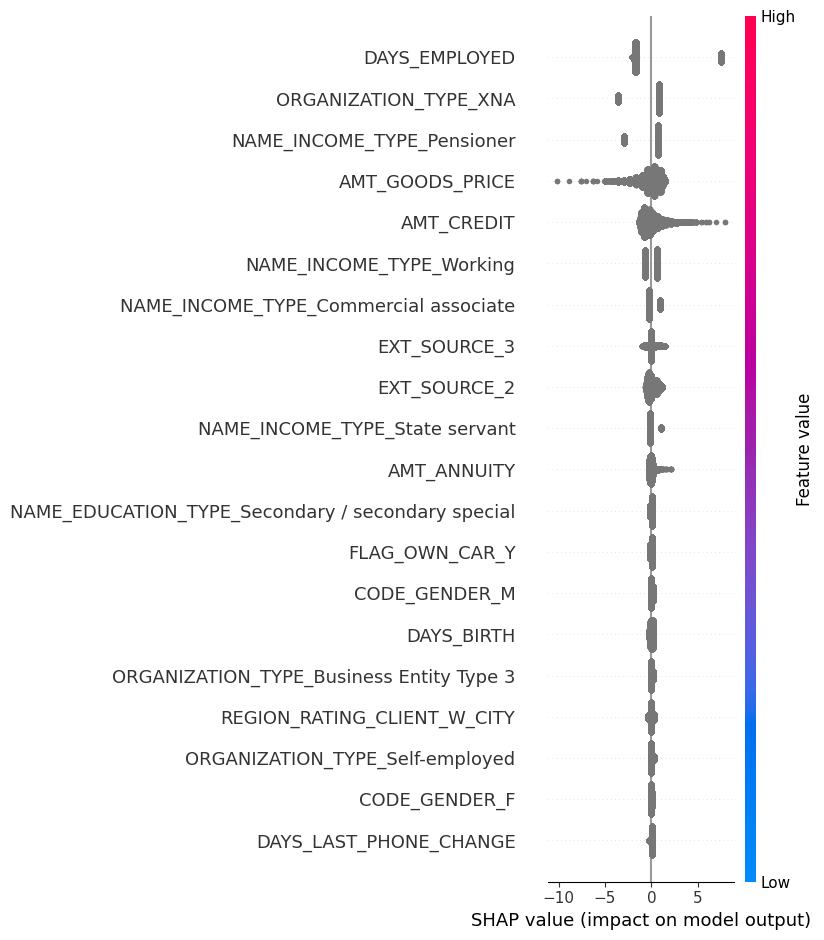

In [59]:
feature_names = preprocessor.transformers_[1][1].get_feature_names_out(input_features=categorical_features)
feature_names = np.concatenate([numerical_features, feature_names])

shap.summary_plot(shap_values, X_test_transformed, feature_names=feature_names)

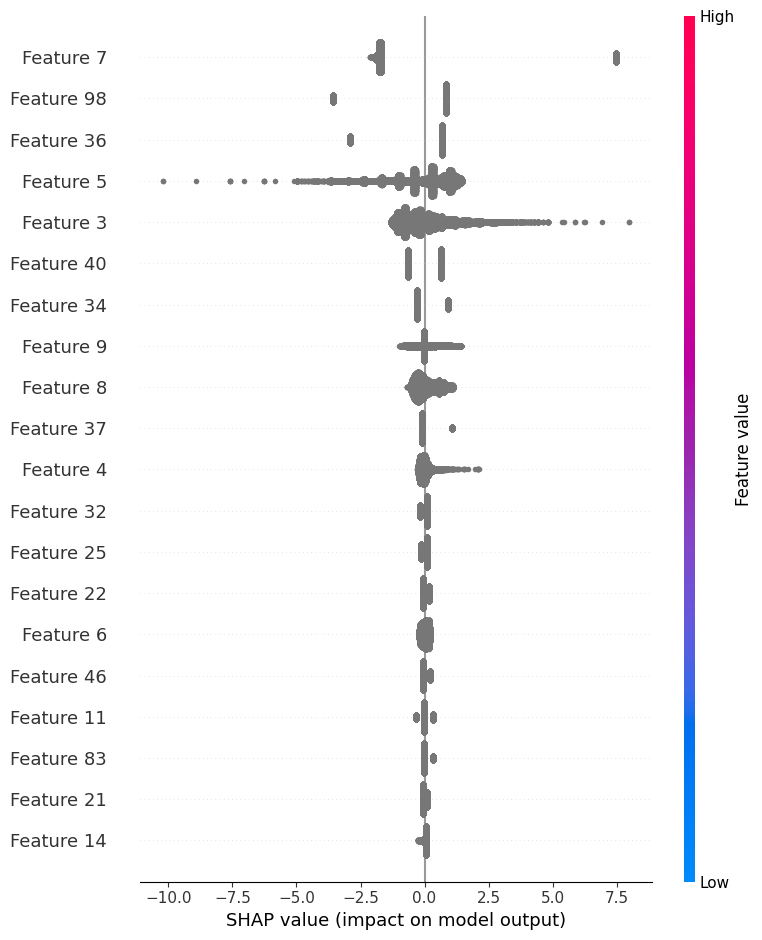

In [60]:
shap.summary_plot(shap_values, X_test_transformed, plot_type='dot')

# Stage 5: Business Strategy

**Feature Importance in Logistic Regression:**
The feature importance plot from logistic regression provides a ranking of the features based on their importance in the model. A positive value suggests a feature that increases the likelihood of the target variable being 1, while a negative value suggests a decrease. The magnitude indicates the strength of the impact. For example, if 'DAYS_EMPLOYED' has a high positive value, it is very influential in predicting a positive outcome (such as loan repayment).

**SHAP Values:**
SHAP values explain the impact of having a certain value for a given feature in comparison to the prediction we'd make if that feature took some baseline value. The color scale represents the feature value (red high, blue low). For instance, 'DAYS_EMPLOYED' being high may push the model output higher (more towards a positive class).

**Conclusion and Business Recommendations:**

Based on the feature importance and SHAP values, it appears that employment duration ('DAYS_EMPLOYED'), income type, and credit amount ('AMT_CREDIT') are significant factors influencing the model's predictions. The SHAP summary plot also suggests that 'EXT_SOURCE' variables, which could be external credit scores, are crucial.

**Business Recommendations:**

1. **Review Loan Criteria:** Considering the importance of employment duration and credit amount, review the loan approval criteria to ensure they include a comprehensive assessment of the applicant's employment stability and the loan amount in relation to their income and employment history.

2. **Enhance Credit Scoring Model:** Incorporate external credit scores ('EXT_SOURCE') more prominently into the credit scoring model as they appear to have a significant impact on the prediction of loan repayment.

3. **Targeted Financial Products:** Develop financial products aimed at individuals with stable employment, as longer employment duration correlates with higher repayment rates.

4. **Risk Mitigation:** For applicants with lower scores in critical features like 'DAYS_EMPLOYED', consider additional risk mitigation strategies such as smaller loan amounts, co-signing requirements, or higher interest rates.

5. **Customer Education:** Offer financial literacy programs to applicants with features indicating higher risk to improve their repayment capability, thus potentially improving the LASR.

By refining credit scoring models and loan approval criteria in line with the key features identified, the business can aim to improve the LASR, balancing financial inclusion and risk management effectively.